In [22]:
import sys
import os
import matplotlib.pyplot as plt

# Add the directory containing your module to Python's search path
module_path = ".."
sys.path.insert(0, module_path)

from tensorcircuit import Circuit, Param, gates, waveforms
from tensorcircuit.cloud.apis import submit_task, get_device, set_provider, set_token, list_devices
import re

In [23]:
shots_const = 1000

print("✅ TEST FILE LOADED")
set_token("xu1LTrkf0nP6sI8oh.bDPdk35RlOQZYy9hQPU6jK2J4d5AdINAOszCNPxTNGZ3-opBPhWcLcruYuSrvX8is1D9tKgw-O4Zg.Qf7fLp83AtSPP19jD6Na4piICkygomdfyxIjzhO6Zu-s5hgBu2709ZW=")
set_provider("tencent")
ds = list_devices()
print(ds)

# TQASM 0.2;
# QREG a[1];
# defcal rabi_test a {
# frame drive_frame = newframe(a); 
# play(drive_frame, cosine_drag($formatted_t, 0.2, 0.0, 0.0)); } 
# rabi_test a[0];
# MEASZ a[0];

✅ TEST FILE LOADED
[tencent::tianji_m2, tencent::tianji_m1v15s4, tencent::tianji_m1v15s2, tencent::tianxuan_s2v20s2, tencent::tianji_m2v16s1, tencent::simulator:tc, tencent::tianji_m2v15s3, tencent::tianxuan_s2, tencent::tianji_s2, tencent::tianji_m2v14s4, tencent::tianxuan_s2v20s1, tencent::tianji_m1v15s1, tencent::tianji_s2v6, tencent::tianji_m1v15s3, tencent::tianji_m2v14s2, tencent::tianji_m1, tencent::tianxuan_s1, tencent::tianji_s2v7]


In [20]:
def gen_parametric_waveform_circuit(t):
    qc = Circuit(1)

    param0 = Param("a")

    builder = qc.calibrate("rabi_test", [param0])
    builder.new_frame("drive_frame", param0)
    builder.play("drive_frame", waveforms.CosineDrag(t, 0.2, 0.0, 0.01))

    builder.build()
    
    tqasm_code = qc.to_tqasm()

    # print(tqasm_code)
    return qc


def run_circuit(qc):
    device_name = "tianji_m2" 
    d = get_device(device_name)
    t = submit_task(
    circuit=qc,
    shots=shots_const,
    device=d,
    enable_qos_gate_decomposition=False,
    enable_qos_qubit_mapping=False,
    )
    rs = t.results()
    return rs



def exp_rabi():
    result_lst = []
    for t in range(1, 400, 2):
        qc = gen_parametric_waveform_circuit(t)
        result = run_circuit(qc)
        result['duration'] = t
        result_lst.append(result)
    return result_lst



def draw_rabi(result_lst):
    data = {
        'duration': [],
        '0': [],
        '1': []
    }
    
    for result in result_lst:
        data['0'].append(int(result['0']) / shots_const)
        data['1'].append(int(result['1']) / shots_const)
        data['duration'].append(result['duration'])


        

    plt.figure(figsize=(10,6))
    plt.plot(data['duration'], data['0'], 'b-o', label='State |0>')
    plt.plot(data['duration'], data['1'], 'r--s', label='State |1>')


    plt.title('Rabi Oscillation Experiment')
    plt.xlabel('Duration (dt)')
    plt.ylabel('Probability')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()


    plt.savefig('rabi.png', dpi=300)
    plt.show()


In [21]:

data = exp_rabi()
draw_rabi(data)

TQASM 0.2;
QREG q[1];

defcal rabi_test a {
  frame drive_frame = newframe(a);
  play(drive_frame, cosine_drag(1, 0.2, 0.0, 0.01));
}
rabi_test q[0];
TQASM 0.2;
QREG q[1];

defcal rabi_test a {
  frame drive_frame = newframe(a);
  play(drive_frame, cosine_drag(3, 0.2, 0.0, 0.01));
}
rabi_test q[0];
TQASM 0.2;
QREG q[1];

defcal rabi_test a {
  frame drive_frame = newframe(a);
  play(drive_frame, cosine_drag(5, 0.2, 0.0, 0.01));
}
rabi_test q[0];
TQASM 0.2;
QREG q[1];

defcal rabi_test a {
  frame drive_frame = newframe(a);
  play(drive_frame, cosine_drag(7, 0.2, 0.0, 0.01));
}
rabi_test q[0];
TQASM 0.2;
QREG q[1];

defcal rabi_test a {
  frame drive_frame = newframe(a);
  play(drive_frame, cosine_drag(9, 0.2, 0.0, 0.01));
}
rabi_test q[0];
TQASM 0.2;
QREG q[1];

defcal rabi_test a {
  frame drive_frame = newframe(a);
  play(drive_frame, cosine_drag(11, 0.2, 0.0, 0.01));
}
rabi_test q[0];
TQASM 0.2;
QREG q[1];

defcal rabi_test a {
  frame drive_frame = newframe(a);
  play(drive_frame, 

Fails at fetching url: http://111.230.11.154/cloud/quk/task/detail. Try again.


ValueError: {"code": 0, "status": "502 Bad Gateway", "desc": "\u672a\u77e5\u9519\u8bef", "Contents": ["\u672a\u77e5\u5f02\u5e38", "\u5982\u9700\u5e2e\u52a9\u8bf7\u7acb\u5373\u81f4\u75358000\u70ed\u7ebf\u6216\u4f01\u4e1a\u5fae\u4fe1&nbsp;<a class=\"a\" href=\"wxwork://message?username=8000\u52a9\u624b\"><i class=\"icon\"></i>8000\u52a9\u624b\uff08IT\u4e1a\u52a1\uff09</a> \uff0c7x24\u5c0f\u65f6\u4e3a\u60a8\u670d\u52a1"], "version": "3.0.30.217"}

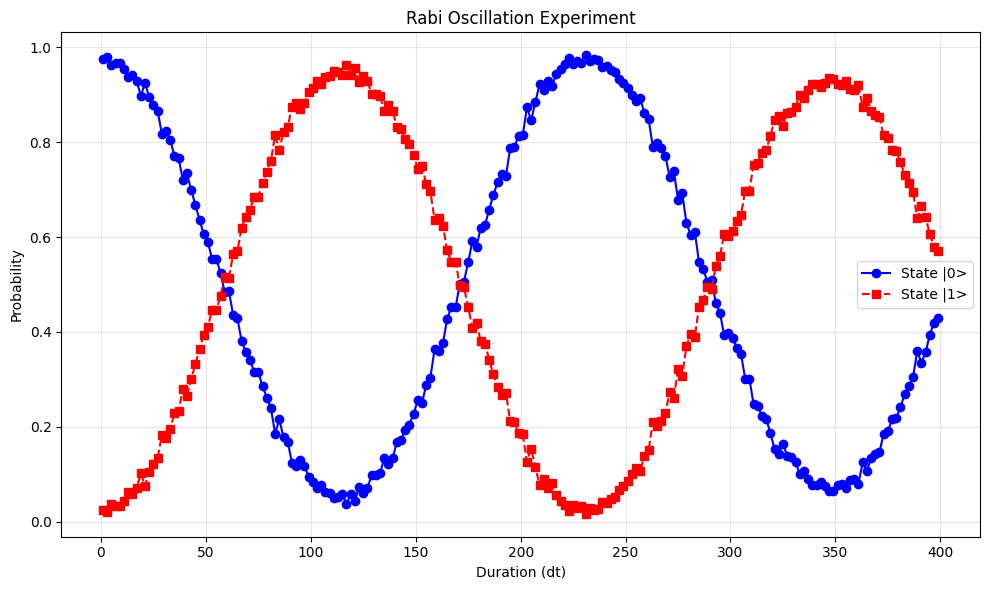

In [17]:
draw_rabi(data)